# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('06-x_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('06-x_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('06-y_train-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('06-y_test-RAVDESS-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)

In [3]:
x_train

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
90,0.686283,-13.365475,21.805387,0.117362,-0.021745,0.322117,29.065540,-9.949350,4.122379,-19.894485,...,18.396330,504.795868,1264.451050,-11.238270,1474.455933,905.831726,-22.195908,2472.879883,701.091248,-27.536795
531,0.133466,-14.529531,22.736057,0.112346,-0.023369,0.032919,18.559624,10.611594,4.591365,-19.379351,...,19.466185,589.415955,1160.766357,-61.190533,1689.937988,812.833435,-72.793419,2699.937988,869.368103,-76.697639
492,0.183029,-13.627054,22.315231,0.124793,-0.027166,0.045454,23.496080,10.312009,3.196333,-7.855220,...,22.666872,625.758667,1158.075317,-37.016109,1695.405518,800.553040,-50.555527,2700.184814,785.643494,-55.593662
200,0.523292,-10.153658,22.308111,0.144648,-0.011178,0.282330,27.493036,-11.956691,-4.424508,-13.302747,...,17.931633,652.066223,1089.980835,-5.874428,1658.170044,807.325623,-15.494067,2639.942871,858.077698,-22.693600
402,2.682242,12.360218,12.542377,0.056838,0.007022,1.791305,-14.205788,-36.585232,-26.608820,-18.001987,...,15.256498,994.205811,910.718018,7.747478,2060.611328,854.444702,2.405577,3003.860840,842.517822,2.130888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0.283596,-13.299419,25.118744,0.044590,-0.014351,0.099824,35.764061,-1.885084,16.389793,-2.305246,...,23.867781,538.415894,1340.674194,-3.173047,1518.291382,1065.604126,-14.805732,2579.634033,810.602112,-22.540342
9,0.093795,-11.796680,20.428913,0.037718,-0.018227,0.017418,26.071024,7.912013,15.630949,-2.663414,...,11.617766,601.591003,1185.978882,-94.244774,1640.789185,834.311829,-101.348862,2609.575928,870.959167,-104.110413
359,0.446532,-12.687489,20.756443,0.060692,-0.019685,0.167253,23.574137,9.460127,8.270959,-5.526428,...,16.390491,498.381622,1125.148682,-29.589844,1494.545288,802.199646,-40.953072,2501.636230,619.473389,-44.815826
192,0.286837,-11.549992,18.774134,0.085880,-0.021647,0.091296,28.928902,-1.466480,7.663468,-3.639192,...,15.776812,423.518951,1167.467285,-26.100771,1417.748047,833.290955,-35.354836,2365.710693,752.638855,-39.228447


# **SELECCION DE CARACTERISTICAS**

In [4]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **BALANCEO DE DATOS**

In [5]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [6]:
overs = RandomOverSampler()

In [7]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [8]:
y_t_overs

,Emociones
0,0
1,3
2,3
3,3
4,0
...,...
571,2
572,2
573,2
574,2


# **MODELO DE MARCHINE LEARNING**

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)

clf.fit(x_t_overs, y_t_overs) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [10]:
#para generar 300 un nuevo modelo y guardar el que tiene mayor accuracy
from sklearn import metrics
mayor=0
for i in range(600):
  overs = RandomOverSampler()
  overs.fit(x_train, y_train)
  x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

  clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
  clf.fit(x_t_overs, y_t_overs)
  y_predict = clf.predict(x_test)
  predicion = metrics.accuracy_score(y_test, y_predict)
  if predicion >mayor:
    mayor= predicion
    modelo = clf
  print(f" prueba :{i} PRECISION ====  {metrics.accuracy_score(y_test, y_predict)} ")
clf= modelo

 prueba :0 PRECISION ====  0.4878048780487805 
 prueba :1 PRECISION ====  0.4634146341463415 
 prueba :2 PRECISION ====  0.5040650406504065 
 prueba :3 PRECISION ====  0.4959349593495935 
 prueba :4 PRECISION ====  0.4878048780487805 
 prueba :5 PRECISION ====  0.4878048780487805 
 prueba :6 PRECISION ====  0.5609756097560976 
 prueba :7 PRECISION ====  0.4796747967479675 
 prueba :8 PRECISION ====  0.4878048780487805 
 prueba :9 PRECISION ====  0.5121951219512195 
 prueba :10 PRECISION ====  0.4959349593495935 
 prueba :11 PRECISION ====  0.4878048780487805 
 prueba :12 PRECISION ====  0.4796747967479675 
 prueba :13 PRECISION ====  0.5040650406504065 
 prueba :14 PRECISION ====  0.44715447154471544 
 prueba :15 PRECISION ====  0.5040650406504065 
 prueba :16 PRECISION ====  0.4959349593495935 
 prueba :17 PRECISION ====  0.5284552845528455 
 prueba :18 PRECISION ====  0.4715447154471545 
 prueba :19 PRECISION ====  0.4959349593495935 
 prueba :20 PRECISION ====  0.4959349593495935 
 

In [11]:
y_predict = clf.predict(x_test)
y_predict

array([1, 2, 1, 0, 2, 2, 0, 3, 3, 3, 3, 1, 2, 1, 0, 0, 3, 0, 0, 1, 0, 0,
       3, 0, 1, 1, 3, 3, 0, 0, 0, 0, 2, 2, 0, 3, 1, 3, 3, 1, 0, 3, 3, 0,
       1, 0, 1, 0, 2, 3, 3, 0, 0, 3, 3, 1, 1, 2, 3, 2, 1, 3, 0, 0, 0, 0,
       0, 2, 2, 3, 3, 3, 3, 0, 0, 2, 3, 3, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 1, 0, 1, 3, 0, 3, 0, 2, 3, 0, 3,
       0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 2, 1, 0])

# **EVALUACION**

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.60      0.64      0.62        39
           1       0.56      0.43      0.48        35
           2       0.58      0.65      0.61        17
           3       0.57      0.62      0.60        32

    accuracy                           0.58       123
   macro avg       0.58      0.59      0.58       123
weighted avg       0.58      0.58      0.57       123



In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.60      0.64      0.62        39
           1       0.56      0.43      0.48        35
           2       0.58      0.65      0.61        17
           3       0.57      0.62      0.60        32

    accuracy                           0.58       123
   macro avg       0.58      0.59      0.58       123
weighted avg       0.58      0.58      0.57       123

Matriz de confusión, sin normalización
[[25 10  1  3]
 [13 15  1  6]
 [ 0  0 11  6]
 [ 4  2  6 20]]


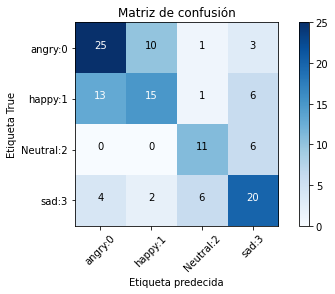

In [14]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')